In [12]:
import numpy as np
import pickle
import sys
from matplotlib import pyplot as plt

In [13]:
import os

directories = ["diffusion_model", "diffusion_result"]

for dir_name in directories:
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

In [14]:
# Given parameters
nx = 60
ny = 60
m=nx*ny
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

training_params = np.arange(80,121,5)
print("nt={}".format(nt))
print("training parameters={}".format(training_params))

file_name_SVD="./diffusion_model/ex16_SVD.p"
print(file_name_SVD)

nt=500
training parameters=[ 80  85  90  95 100 105 110 115 120]
./diffusion_model/ex16_SVD.p


In [15]:
# load snapshot
snapshot = np.array([])
for i in training_params:
    ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(i), allow_pickle = True)
    ex = ex.f.arr_0
    snapshot = np.append(snapshot, ex)
snapshot = snapshot.reshape(len(training_params)*(nt+1),-1)
print('data shape \t {}'.format(snapshot.shape))
print('data dtype \t {}'.format(snapshot.dtype))

snapshot_u = np.copy(snapshot)

# do svd decomposition
U_u,S_u,V_uT=np.linalg.svd(snapshot_u.T,full_matrices=False)

# save SVD
SVD={'U':U_u,'S':S_u,'VT':V_uT}
with open(file_name_SVD,'wb') as ff:
    pickle.dump(SVD,ff)

data shape 	 (4509, 3600)
data dtype 	 float64


# of POD Basis: [3 4 5 6]
./diffusion_result/ex16_POD_3_proj_result.p
accuracy: 99.88972336328219
./diffusion_result/ex16_POD_4_proj_result.p
accuracy: 99.98403716323996
./diffusion_result/ex16_POD_5_proj_result.p
accuracy: 99.99570705004628
./diffusion_result/ex16_POD_6_proj_result.p
accuracy: 99.99814287381948


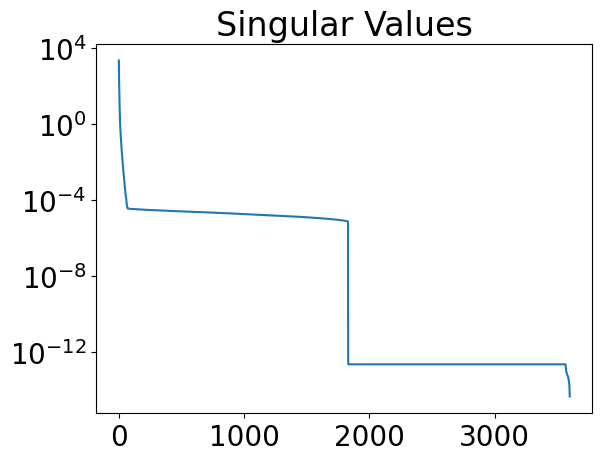

In [16]:
# file path
file_name_SVD="./diffusion_model/ex16_SVD.p"

basis_list=np.array([3,4,5,6])
print("# of POD Basis:",basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]

    # file path
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]
    S_u=SVD['S']

    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))
    
plt.figure()
plt.semilogy(S_u)
plt.title("Singular Values")
# plt.show()
plt.savefig("./diffusion_result/ex16_SVD.png")

# Projection error

In [17]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
import time, sys
import pickle

In [18]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
free_multi_index=(multi_index_j[1:-1,1:-1].flatten(),multi_index_i[1:-1,1:-1].flatten())
x0_multi_index=(multi_index_j[1:-1,0].flatten(),multi_index_i[1:-1,0].flatten())
x1_multi_index=(multi_index_j[1:-1,-1].flatten(),multi_index_i[1:-1,-1].flatten())
y0_multi_index=(multi_index_j[0,1:-1].flatten(),multi_index_i[0,1:-1].flatten())
y1_multi_index=(multi_index_j[-1,1:-1].flatten(),multi_index_i[-1,1:-1].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
free_raveled_indicies=np.ravel_multi_index(free_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
x01_raveled_indicies=np.concatenate((x0_raveled_indicies,x1_raveled_indicies))
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
y01_raveled_indicies=np.concatenate((y0_raveled_indicies,y1_raveled_indicies))
fixed_raveled_indicies=np.setdiff1d(full_raveled_indicies,free_raveled_indicies)

# measurements
msmt_idx=full_raveled_indicies

./diffusion_model/ex16_SVD.p
[3 4 5 6]
POD basis: 3
./diffusion_result/ex16_POD_3_proj_result.p


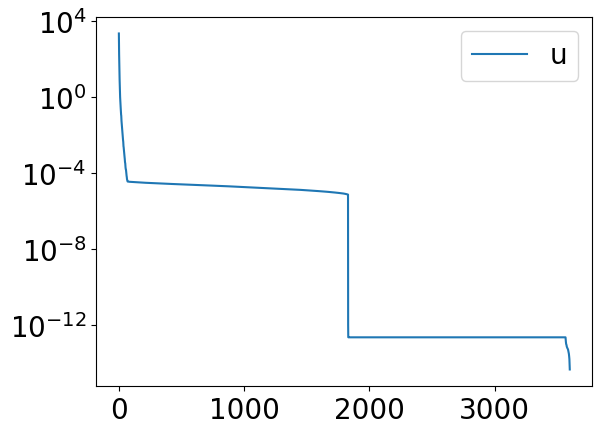

accuracy: 99.88972336328219

Time elapsed: 0.35639452934265137 sec
average relative error of u: 4.8443769240980865%
maximum relative error of u: 5.444310542956447%

Time elapsed: 0.32075953483581543 sec
average relative error of u: 5.179211293584128%
maximum relative error of u: 5.9256984220173035%

Time elapsed: 0.3988039493560791 sec
average relative error of u: 5.857834028718341%
maximum relative error of u: 6.808126399448302%

Time elapsed: 0.2995145320892334 sec
average relative error of u: 6.995836488503902%
maximum relative error of u: 8.155510793972214%

Time elapsed: 0.47080564498901367 sec
average relative error of u: 8.566738356675442%
maximum relative error of u: 9.964064729982299%

Time elapsed: 0.2504267692565918 sec
average relative error of u: 10.438816292865669%
maximum relative error of u: 12.15023276111377%

Time elapsed: 0.13753271102905273 sec
average relative error of u: 12.438869587255748%
maximum relative error of u: 14.55996558872289%

Time elapsed: 0.067485809

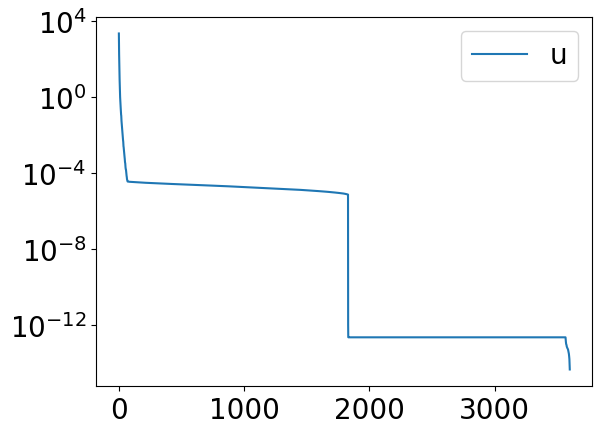

accuracy: 99.98403716323996

Time elapsed: 0.0674138069152832 sec
average relative error of u: 4.526775687563167%
maximum relative error of u: 5.163661958250804%

Time elapsed: 0.06979632377624512 sec
average relative error of u: 4.367281951183611%
maximum relative error of u: 4.919667880730811%

Time elapsed: 0.05902910232543945 sec
average relative error of u: 4.1053502072376995%
maximum relative error of u: 4.5413383936302045%

Time elapsed: 0.061693668365478516 sec
average relative error of u: 3.8088992979542122%
maximum relative error of u: 4.103556195283535%

Time elapsed: 0.06548857688903809 sec
average relative error of u: 3.6079777142202523%
maximum relative error of u: 3.9087355620570934%

Time elapsed: 0.07028388977050781 sec
average relative error of u: 3.7280689383014565%
maximum relative error of u: 4.169878785166546%

Time elapsed: 0.06915783882141113 sec
average relative error of u: 4.439419023948523%
maximum relative error of u: 4.8067056268566795%

Time elapsed: 0.062

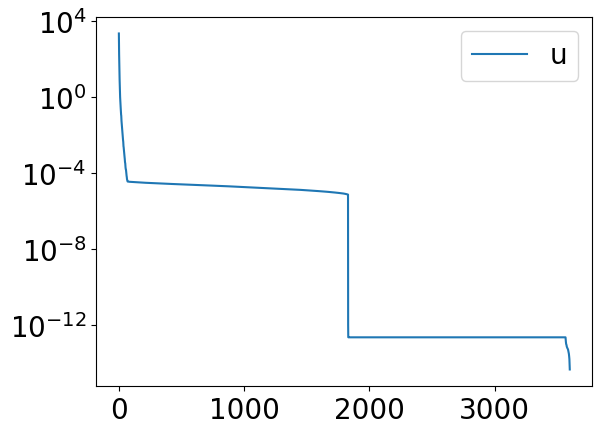

accuracy: 99.99570705004628

Time elapsed: 0.14075779914855957 sec
average relative error of u: 2.174413955273496%
maximum relative error of u: 2.395693815406423%

Time elapsed: 0.12514758110046387 sec
average relative error of u: 2.2070120852745823%
maximum relative error of u: 2.4922821530407284%

Time elapsed: 0.12403035163879395 sec
average relative error of u: 2.4557539167396287%
maximum relative error of u: 2.8171088503366066%

Time elapsed: 0.11998200416564941 sec
average relative error of u: 2.8797410236266927%
maximum relative error of u: 3.246497901873852%

Time elapsed: 0.12341642379760742 sec
average relative error of u: 3.345175997859535%
maximum relative error of u: 3.7203678269200258%

Time elapsed: 0.11920690536499023 sec
average relative error of u: 3.724098332611963%
maximum relative error of u: 4.16970007950318%

Time elapsed: 0.12391209602355957 sec
average relative error of u: 3.9865649892819475%
maximum relative error of u: 4.571701110974081%

Time elapsed: 0.1233

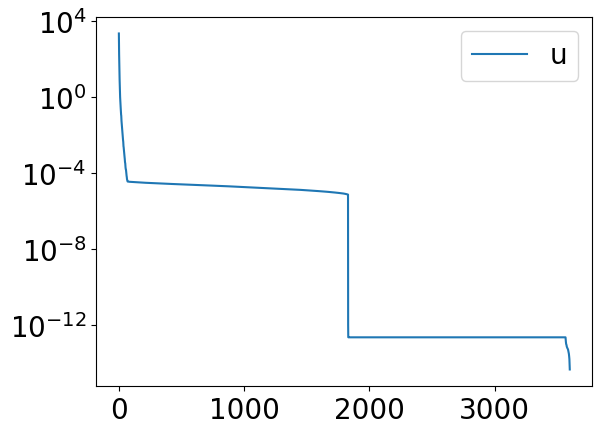

accuracy: 99.99814287381948

Time elapsed: 0.05911135673522949 sec
average relative error of u: 1.8126503805729048%
maximum relative error of u: 2.038692235385663%

Time elapsed: 0.0648050308227539 sec
average relative error of u: 1.5806555497681303%
maximum relative error of u: 1.7610316885005517%

Time elapsed: 0.05963945388793945 sec
average relative error of u: 1.5337903978738925%
maximum relative error of u: 1.697259627210608%

Time elapsed: 0.06132030487060547 sec
average relative error of u: 1.7021278396651278%
maximum relative error of u: 1.7911203342090825%

Time elapsed: 0.060189008712768555 sec
average relative error of u: 1.921247015502078%
maximum relative error of u: 2.1423854112546907%

Time elapsed: 0.06327104568481445 sec
average relative error of u: 1.9986621991091875%
maximum relative error of u: 2.3064359517324116%

Time elapsed: 0.0623021125793457 sec
average relative error of u: 1.891572183118918%
maximum relative error of u: 2.133975379787262%

Time elapsed: 0.12

In [19]:
# file path
file_name_SVD="./diffusion_model/ex16_SVD.p"
print(file_name_SVD)

basis_list=np.array([3,4,5,6])
print(basis_list)

for ii in range(len(basis_list)):
    # POD basis
    POD_basis=basis_list[ii]
    print("POD basis: {}".format(POD_basis))
    
    # file path
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    print(file_path_prj_result)

    SVD = pickle.load(open(file_name_SVD,'rb'))
    phi_u = SVD['U'][:,:POD_basis]

    plt.figure()
    plt.semilogy(S_u)
    plt.legend('u')
    plt.show()
    acc_u=np.sum(S_u[:POD_basis]**2)/np.sum(S_u**2)*100
    print("accuracy: {}".format(acc_u))

    phim_u=phi_u[msmt_idx]
    phim_u_pinv=np.linalg.pinv(phim_u)
    
    results={'avg_rel_err':[],'rel_err':[],'elapsed_time':[]}

    for FOM_parameter in training_params:
        # Load FOM solution
        ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1)

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_ref = u0

        # Gappy POD
        t_start_gappyPOD=time.time()

        # solution
        u_gappyPOD=np.zeros((nt+1,ny*nx))
        u_hat=np.zeros((nt+1,POD_basis))

        # IC
        u_hat0=np.zeros(POD_basis)
        u_gappyPOD[0]=np.copy(u0)

        for n in range(nt):
            u_hat[n+1] = phim_u_pinv.dot(um[n+1]-u_ref[msmt_idx])
            u_gappyPOD[n+1] = u_ref + phi_u.dot(u_hat[n+1])

        # elapsed time
        t_elapsed_gappyPOD=time.time()-t_start_gappyPOD
        print()
        print('Time elapsed: {} sec'.format(t_elapsed_gappyPOD))

        # error
        u_rel_err_gappyPOD=np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)/np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyPOD,ord=2,axis=1)**2))/np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyPOD)))

        # save result
        results['avg_rel_err'].append(u_avg_rel_err)
        results['rel_err'].append(u_rel_err_gappyPOD)
        results['elapsed_time'].append(t_elapsed_gappyPOD)

    results['avg_rel_err']=np.array(results['avg_rel_err'])
    results['rel_err']=np.array(results['rel_err'])
    results['elapsed_time']=np.array(results['elapsed_time'])

    with open(file=file_path_prj_result, mode='wb') as ff:
        pickle.dump(results, ff)

# Plot other cases together

In [20]:
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=28)  # fontsize of the figure title

linestyle=['solid','dotted','dashed','dashdot']

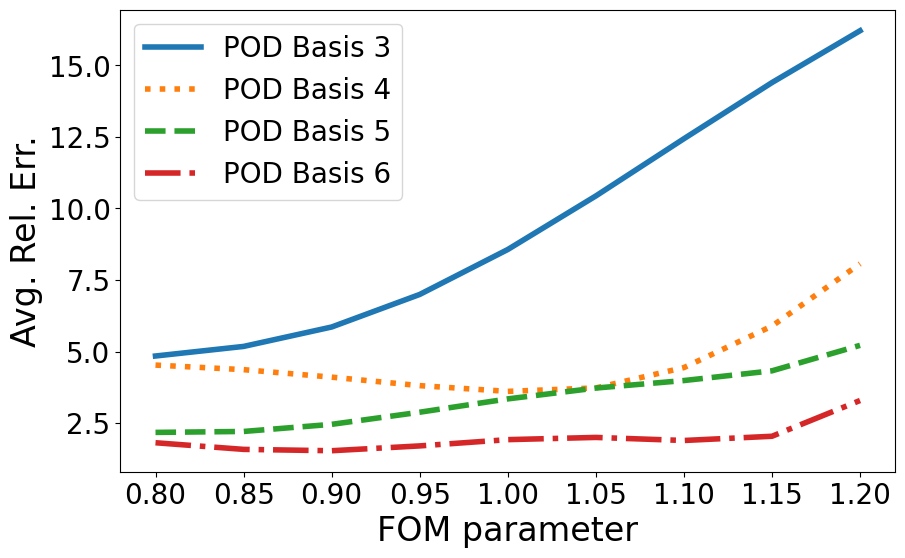

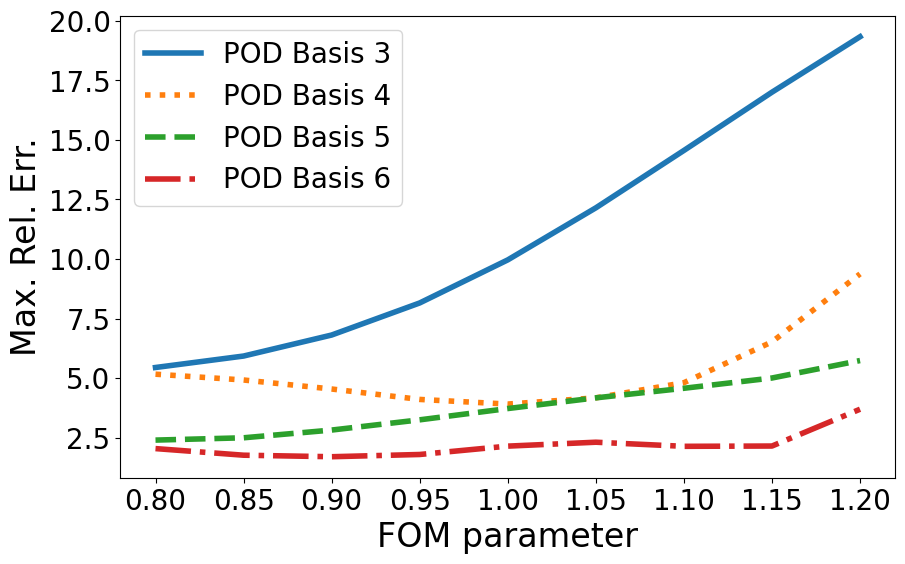

In [21]:
basis_list=np.array([3,4,5,6])

plt.figure(num=1,figsize=(10,6))
plt.figure(num=2,figsize=(10,6))
for i in range(len(basis_list)):
    POD_basis = basis_list[i]
    file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
    with open(file=file_path_prj_result, mode='rb') as ff:
        results=pickle.load(ff)   
    plt.figure(num=1)
    plt.plot(training_params/100,results['avg_rel_err'],linestyle=linestyle[i],linewidth=4)

    plt.figure(num=2)
    plt.plot(training_params/100,results['rel_err'].max(axis=1),linestyle=linestyle[i],linewidth=4)

plt.figure(num=1)    
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./diffusion_result/ex16_POD_proj_avg_rel_err.png")

plt.figure(num=2)
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["POD Basis "+str(POD_basis) for POD_basis in basis_list])
plt.savefig("./diffusion_result/ex16_POD_proj_max_rel_err.png")

In [22]:
print(basis_list)
print(training_params)

[3 4 5 6]
[ 80  85  90  95 100 105 110 115 120]


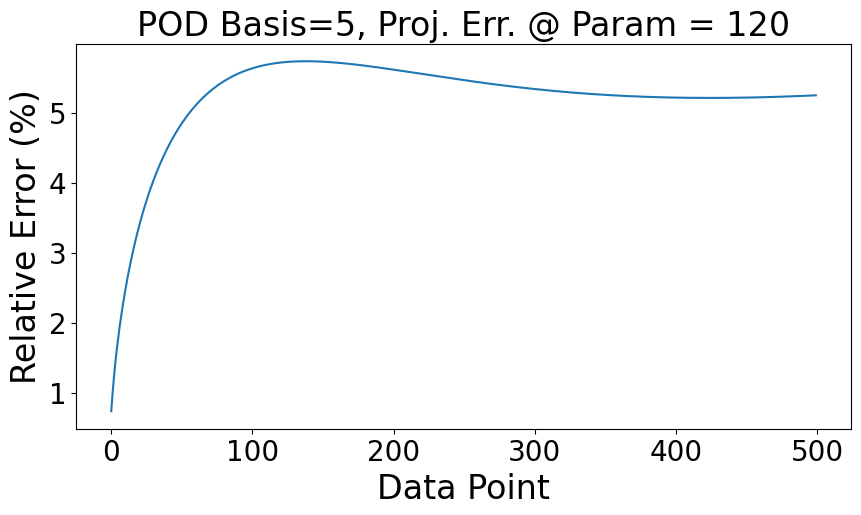

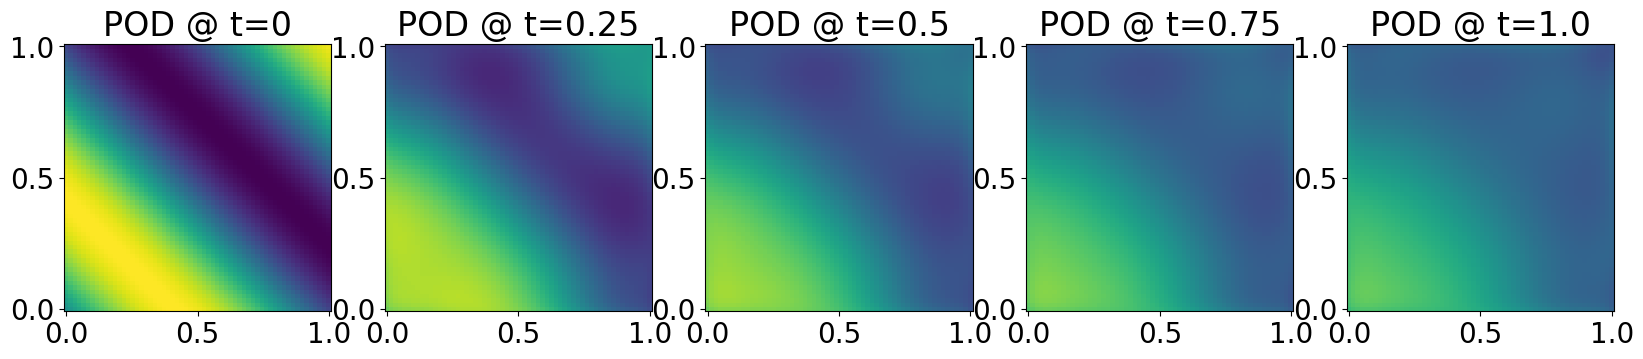

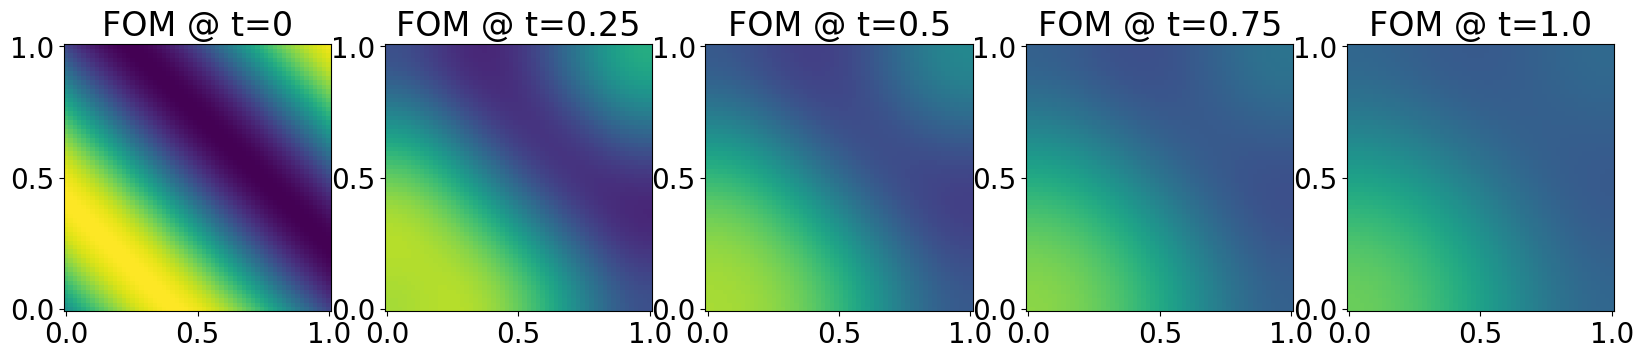

In [23]:
i=2; j=-1        
POD_basis=basis_list[i]
param=training_params[j]

file_path_prj_result = "./diffusion_result/ex16_POD_"+str(POD_basis)+"_proj_result.p"
with open(file=file_path_prj_result, mode='rb') as ff:
    results=pickle.load(ff)  

u_rel_err_gappyPOD=results['rel_err'][j,1:]
plt.figure(figsize=(10,5))

plt.plot(u_rel_err_gappyPOD.flatten())
plt.xlabel('Data Point')
plt.ylabel('Relative Error (%)')
plt.title('POD Basis={}, Proj. Err. @ Param = {}'.format(POD_basis,param))
plt.show()

# plot original data
vmin=0; vmax=1

# POD
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyPOD[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('POD @ t={}'.format(dt*nt))

plt.show()

# FOM
plt.figure(figsize=(20,4))

plt.subplot(1,5,1)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[0].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t=0')

plt.subplot(1,5,2)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)))

plt.subplot(1,5,3)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*2].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*2))

plt.subplot(1,5,4)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*3].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*int(nt/4)*3))

plt.subplot(1,5,5)
plt.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[nt].reshape(ny,nx),vmin=vmin,vmax=vmax)
plt.axis('square')
plt.title('FOM @ t={}'.format(dt*nt))

plt.show()